# Tugas Besar Pengantar Kecerdasan Buatan dan Sistem Cerdas
Assesment CLO-3

**Kelas IF-45-04**

**Kelompok 3**

**Ketua     :** Fathan Askar - 1301213374

**Anggota   :**

Muhammad Ilham Hakim Somantri - 1301210330

Farhan Faturahman - 1301213188

Fajari Salim Hanri - 1301213299

Algoritma Learning yang digunakan yaitu **Algoritma kNN** dan **Algoritma Naïve Bayes**

Berikut adalah Google Colab **Algoritma kNN**


# Dataset

In [ ]:
!pip install pandas
!pip install numpy
!pip install math
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def read_excel(path, sheet_target): # read excel data
    data = pd.read_excel(path, sheet_name=sheet_target)
    return pd.DataFrame(data)

In [ ]:
dwn_url = 'https://drive.google.com/uc?export=download&id=1JAETfbmhgCo2XpPP6C0yGG0M7N73W7BU'
data = read_excel(dwn_url,sheet_target="arrhythmia")
data

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,1,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,5,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,0,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,0,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


# Dataset Exploration dan Data Pre-Processing

In [ ]:
data.head()

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
0,1,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,5,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 281 entries, No to Class
dtypes: float64(120), int64(156), object(5)
memory usage: 992.4+ KB


In [ ]:
data.columns.values

array(['No', 'age', 'sex', 'height', 'weight', 'qrsDur', 'prInterval',
       'qtInterval', 'tInterval', 'pInterval', 'QRS', 'T', 'P', 'QRST',
       'J', 'heartRate', 'ofChannelDI1', 'ofChannelDI2', 'ofChannelDI3',
       'ofChannelDI4', 'ofChannelDI5', 'ofChannelDI6', 'ofChannelDI7',
       'ofChannelDI8', 'ofChannelDI9', 'ofChannelDI10', 'ofChannelDI11',
       'ofChannelDI12', 'ofChannelDII1', 'ofChannelDII2', 'ofChannelDII3',
       'ofChannelDII4', 'ofChannelDII5', 'ofChannelDII6', 'ofChannelDII7',
       'ofChannelDII8', 'ofChannelDII9', 'ofChannelDII10',
       'ofChannelDII11', 'ofChannelDII12', 'ofChannelDIII1',
       'ofChannelDIII2', 'ofChannelDIII3', 'ofChannelDIII4',
       'ofChannelDIII5', 'ofChannelDIII6', 'ofChannelDIII7',
       'ofChannelDIII8', 'ofChannelDIII9', 'ofChannelDIII10',
       'ofChannelDIII11', 'ofChannelDIII12', 'ofChannelAVR1',
       'ofChannelAVR2', 'ofChannelAVR3', 'ofChannelAVR4', 'ofChannelAVR5',
       'ofChannelAVR6', 'ofChannelAVR7', 'ofChann

In [ ]:
data.Class.unique()

array([ 8,  6, 10,  1,  7, 14,  3, 16,  2,  4,  5,  9, 15])

In [ ]:
data.Class.info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Class
Non-Null Count  Dtype
--------------  -----
452 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
data.describe()

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,226.500000,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,130.625419,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,1.000000,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,113.750000,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,226.500000,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,339.250000,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,452.000000,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
data.shape

(452, 281)

<Axes: >

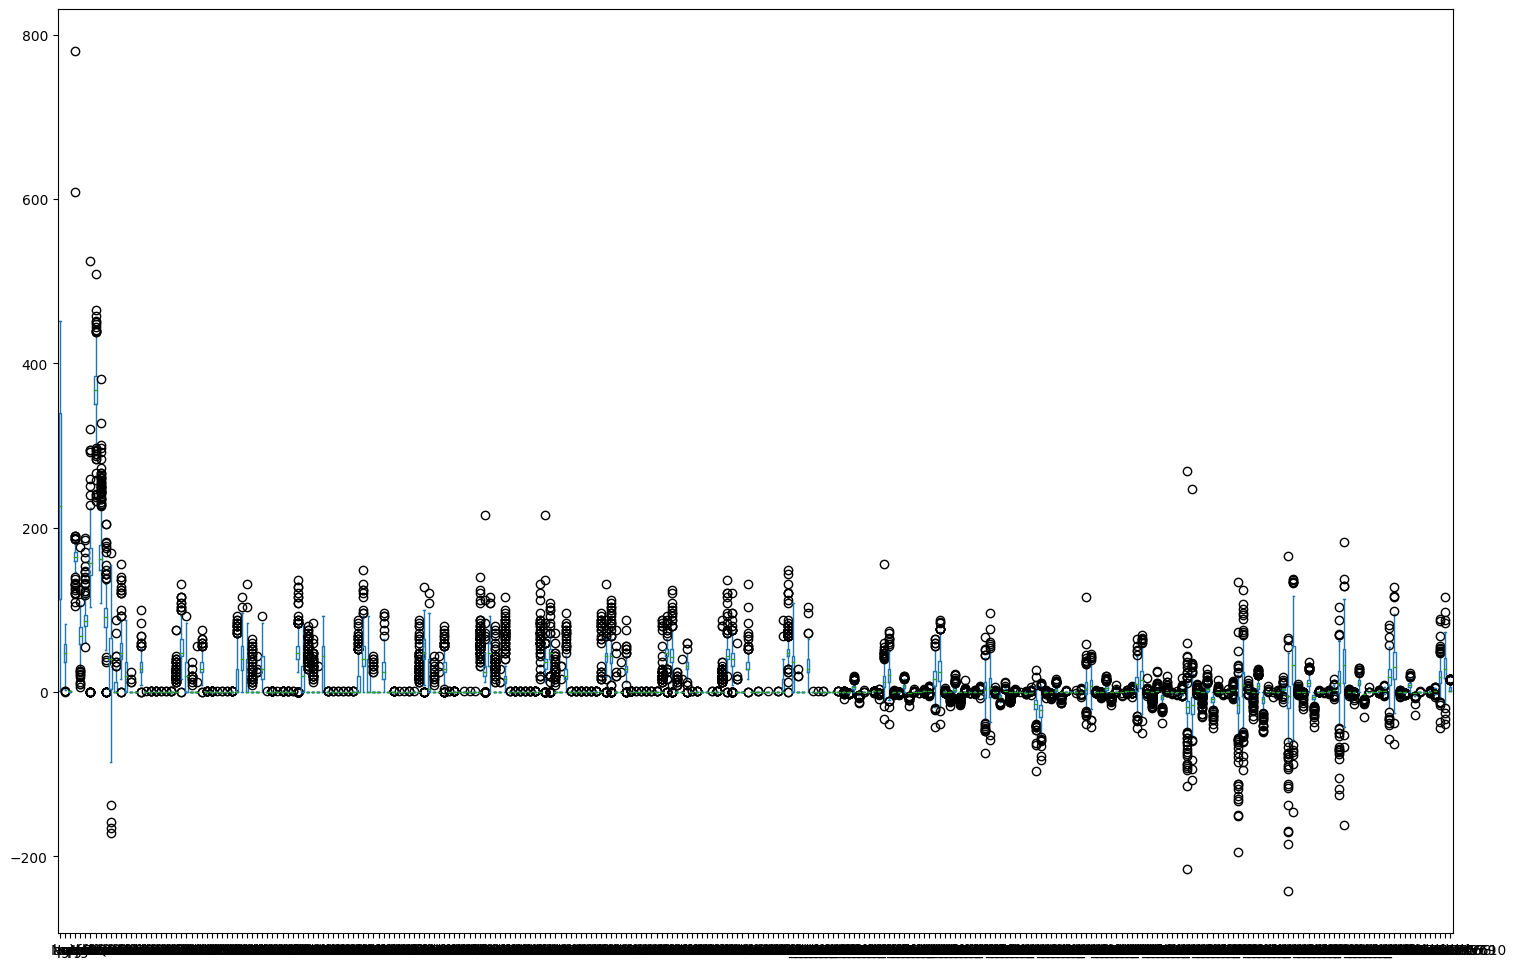

In [ ]:
#Ini merupakan boxplot dari datanya
#Kita bisa melihat bahwa banyak sekali data outlier pada data berikut, maka kami harus melakukan pembersihan data terdahulu
data.plot(kind='box',figsize = (18,12))

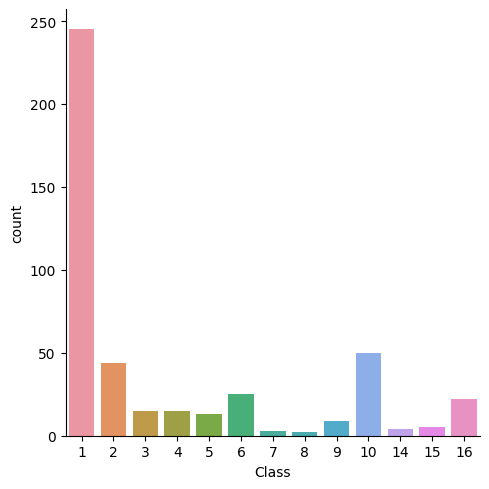

In [ ]:
#Melihat jumlah data setiap Class
#Dari sini kita bisa melihat bahwa jumalah data class 7, 8, 14, 15 sangat sedikit dibandingkan data yang lain untunk diproses saat dimasukkan ke dalam modul learning
#Dari sini kita bisa melihat bahwa jumalah data class 1 sangat banyak dibandingkan data yang lain untunk diproses saat dimasukkan ke dalam modul learning
sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

In [ ]:
#drop row yang datanya kurang dari 5
data = data[data['Class'] != 7]
data = data[data['Class'] != 8]
data = data[data['Class'] != 14]
data = data[data['Class'] != 15]

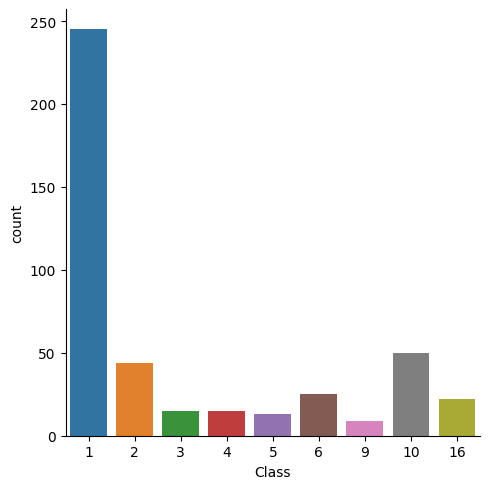

In [ ]:
#Melihat jumlah data setiap Class, setelah class yang kurang dari 5 di keluarkan
sns.catplot(x = 'Class',data = data , kind = 'count')
plt.show()

In [ ]:
count_missing_value = data.eq('?').sum()
index = 0
for column, count in count_missing_value.items():
  if count>0:
    print(column,':', count)


T : 8
P : 17
QRST : 1
J : 367


In [ ]:
data = data.drop('J',axis=1) #Data pada column J terlalu banyak yang missing valuenya ('?'), makanya di drop.

#Function untuk menggubah data yang '?' pada column lain yang tidak memiliki  missing value yang terlalu banyak menjadi rata-rata pada column tersebut.
def missing_val_into_mean(data, missing_marker='?'):
  for column in data.columns: #loop semua column pada data
    data[column] = data[column].replace(missing_marker,np.nan) #mengubah '?' menjadi nan
    data[column] = pd.to_numeric(data[column]) #convert data menjadi numeric pada column untuk mendapatkan mean column
    mean_value = data[column].mean() #mendapatkan nilai mean pada column
    data[column].fillna(mean_value, inplace = True) #mengisi data yang nan menjadi mean
  return data
data = missing_val_into_mean(data, missing_marker='?')
data
#print(data)

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
6,7,40,1,160,52,77,129,377,133,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,8,49,1,162,54,78,0,376,157,70,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,0,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,0,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
#ganti sex 0 jadi 2 biar gk ke drop di atas 30 persen 0nya
data['sex'] = data['sex'].replace(0, 2)

In [ ]:
data.sex

1      1
2      2
3      2
6      1
7      1
      ..
447    1
448    2
449    2
450    1
451    1
Name: sex, Length: 438, dtype: int64

In [ ]:
data

,No,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,...,_2ofChannelV62,_2ofChannelV63,_2ofChannelV64,_2ofChannelV65,_2ofChannelV66,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,2,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,3,54,2,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,4,55,2,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
6,7,40,1,160,52,77,129,377,133,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,8,49,1,162,54,78,0,376,157,70,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,53,1,160,70,80,199,382,154,117,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,449,37,2,190,85,100,137,361,201,73,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,450,36,2,166,68,108,176,365,194,116,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,451,32,1,155,55,93,106,386,218,63,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# Cleaning Data
# Mengedrop data frame yang memiliki missing value 0/0.0/.0 diatas 30% / 0.3
data = data.drop('No',axis=1) #Mengedrop column No karena ini berfungsi sebagai penomoran data saja


def drop_columns_with_high_zero_frequency(data, threshold=0.3):
    columns_to_drop = [] #inisialisasai list yang column perlu di drop
    tot = 0 #insiaisasi jumlah column yang di drop
    for column in data.columns: #loop semua column pada data
        zero_count = (data[column] == 0).sum() | (data[column] == '0.0').sum() | (data[column] == '.0').sum() #menjumlahkan nilai 0 atau 0.0 atau .0 pada column tersebut
        zero_frequency = zero_count / len(data) #mendapatkan frequency atau percentage dari 0 pada column tersebut
        if zero_frequency >= threshold:
            tot+=1
            columns_to_drop.append(column) #nama column masuk pada list columns_to_drop agar nanti bisa di drop

    data.drop(columns_to_drop, axis=1, inplace=True) #mengedrop semua column pada list columns_to_drop
    print(tot) #mengoutputkan jumlah column yang di drop
    return data

data = drop_columns_with_high_zero_frequency(data, threshold=0.3)
print(data)

159
     age  sex  height  weight  qrsDur  prInterval  qtInterval  tInterval  \
1     56    1     165      64      81         174         401        149   
2     54    2     172      95     138         163         386        185   
3     55    2     175      94     100         202         380        179   
6     40    1     160      52      77         129         377        133   
7     49    1     162      54      78           0         376        157   
..   ...  ...     ...     ...     ...         ...         ...        ...   
447   53    1     160      70      80         199         382        154   
448   37    2     190      85     100         137         361        201   
449   36    2     166      68     108         176         365        194   
450   32    1     155      55      93         106         386        218   
451   78    1     160      70      79         127         364        138   

     pInterval  QRS  ...  _2ofChannelV58  _2ofChannelV59  _2ofChannelV510  \
1     

In [ ]:
#membuat function untuk mendapatkan outlier2 pada data
def find_outliers(data, threshold=1.5):
    outliers = {} #Menginisialisasi dictionary untuk menampung data outlier yang ditemukan
    for column in data.columns: #looping pada setiap column pada data
        if data[column].dtype != 'object': #jika isi data pada column yang di datangi itu bukan objek maka kita akan bisa menghitung outliernya
            q1 = data[column].quantile(0.25) #menghitung q1 column
            q3 = data[column].quantile(0.75) #menghitung q3 column
            iqr = q3 - q1 #menghitung iqr atau inter quartile range column
            lower_bound = q1 - (threshold * iqr) #menghitung lower bound column
            upper_bound = q3 + (threshold * iqr) #menghitung upper bound column
            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
            #mengisi column outliers jika data pada column tersebut diatas
            #upper bound atau di bawah lower bound
            outliers[column] = column_outliers #memasukan data outlier pada setiap column di dictionary outliers
    return outliers
outliers = find_outliers(data, threshold=1.5)
for column, values in outliers.items():
    print(f"Outliers in column {column}:")
    print(values)
    print()

Outliers in column age:
60     1
141    1
316    0
Name: age, dtype: int64

Outliers in column sex:
Series([], Name: sex, dtype: int64)

Outliers in column height:
60     110
113    132
126    186
141    780
198    133
210    124
297    130
316    608
320    105
332    188
346    186
379    120
403    127
423    186
424    119
429    130
430    138
432    140
448    190
Name: height, dtype: int64

Outliers in column weight:
60      10
126     18
141      6
210     25
213    176
254    124
308    110
316     10
320     12
379     28
403     22
424     21
429     24
430     29
Name: weight, dtype: int64

Outliers in column qrsDur:
2      138
85     163
88     170
89     137
189    153
207    146
293    132
297    131
312    123
370    146
379    118
388    188
395    147
403    185
424    140
426     55
427    133
430    123
Name: qrsDur, dtype: int64

Outliers in column prInterval:
7        0
20     251
48     228
56       0
64       0
71     294
95     292
106      0
108      0
110    

In [ ]:
def replace_outliers_with_mean(data, threshold=1.5):
    outliers = {} #Menginisialisasi dictionary untuk menampung data outlier yang ditemukan
    for column in data.columns: #looping pada setiap column pada data
        if data[column].dtype != 'object': #jika isi data pada column yang di datangi itu bukan objek maka kita akan bisa menghitung outliernya
            q1 = data[column].quantile(0.25) #menghitung q1 column
            q3 = data[column].quantile(0.75) #menghitung q3 column
            iqr = q3 - q1 #menghitung iqr atau inter quartile range column
            lower_bound = q1 - (threshold * iqr) #menghitung lower bound column
            upper_bound = q3 + (threshold * iqr) #menghitung upper bound column
            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
            #mengisi column outliers jika data pada column tersebut diatas
            #upper bound atau di bawah lower bound
            outliers[column] = column_outliers #memasukan data outlier pada setiap column di dictionary outliers
            data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].mean()
            #Mengganti isi data outlier pada column dengan nilai mean pada column tersebut
    return data
data = replace_outliers_with_mean(data, threshold=1.5)

<Axes: >

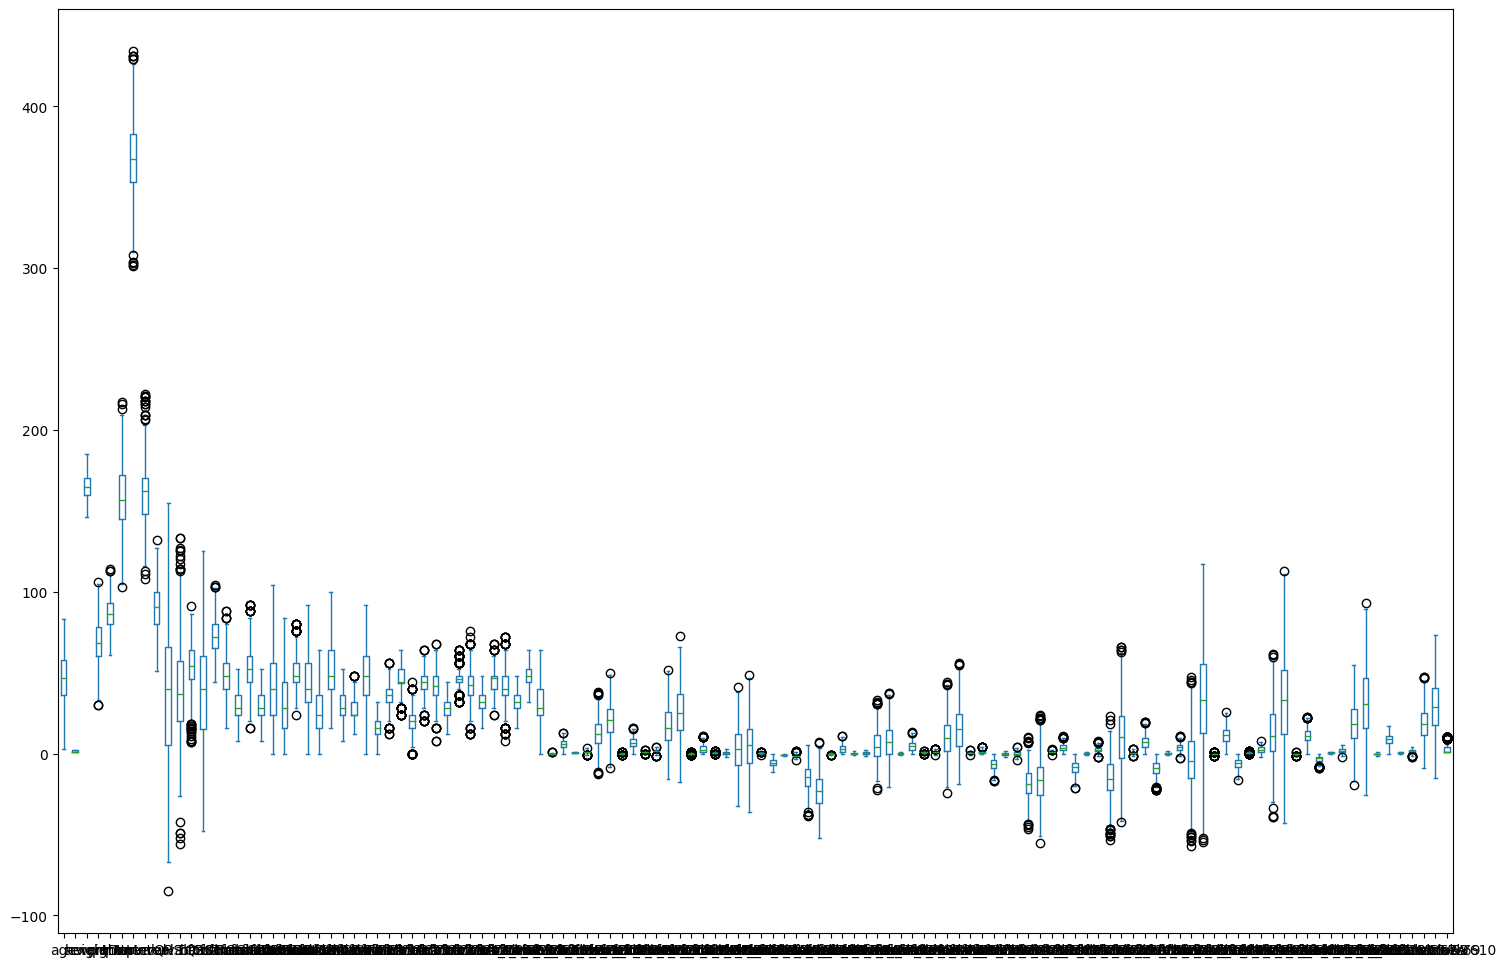

In [ ]:
#Boxplot setelah outlier di ganti menjadi mean
data.plot(kind='box',figsize = (18,12))

In [ ]:
# data = data.sample(452).reset_index(drop=True) #untuk shuffle data biar gk terurut (gaperlu sih udah ga terurut dari sononya)
#membuat Class menjadi 2 yaitu 0 untuk sakit arrhytmia, 1 untuk sehat
data['Class'] = data['Class'].apply(lambda x: 0 if x != 1 else x)
data

,age,sex,height,weight,qrsDur,prInterval,qtInterval,tInterval,pInterval,QRS,...,_2ofChannelV58,_2ofChannelV59,_2ofChannelV510,_2ofChannelV61,_2ofChannelV63,_2ofChannelV67,_2ofChannelV68,_2ofChannelV69,_2ofChannelV610,Class
1,56.0,1.0,165.000000,64.0,81.000000,174.000000,401.0,149.0,90.842466,25.0,...,2.600000,21.60000,43.400000,-0.500000,8.5,0.200000,2.1,20.400000,38.800000,0.0
2,54.0,2.0,172.000000,95.0,88.737443,163.000000,386.0,185.0,102.000000,96.0,...,3.400000,11.50000,48.200000,-0.296119,9.5,0.300000,3.4,12.300000,49.000000,0.0
3,55.0,2.0,175.000000,94.0,100.000000,202.000000,380.0,179.0,90.842466,28.0,...,3.000000,36.80000,68.000000,0.100000,12.2,0.400000,2.6,34.600000,61.600000,1.0
6,40.0,1.0,160.000000,52.0,77.000000,129.000000,377.0,133.0,77.000000,77.0,...,1.300000,9.30000,18.900000,-0.400000,6.5,0.400000,1.0,14.300000,20.500000,1.0
7,49.0,1.0,162.000000,54.0,78.000000,156.474886,376.0,157.0,70.000000,67.0,...,0.800000,14.50000,20.900000,-0.300000,8.2,0.100000,0.5,15.800000,19.800000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160.000000,70.0,80.000000,199.000000,382.0,154.0,117.000000,-37.0,...,1.000000,-8.40000,-0.600000,0.000000,4.3,0.700000,0.6,-4.400000,-0.500000,1.0
448,37.0,2.0,166.207763,85.0,100.000000,137.000000,361.0,201.0,73.000000,86.0,...,3.700000,50.70000,82.500000,-0.500000,15.6,0.400000,2.4,38.000000,62.400000,0.0
449,36.0,2.0,166.000000,68.0,108.000000,176.000000,365.0,194.0,116.000000,-85.0,...,1.727169,17.61621,32.657991,-0.296119,16.3,0.523288,1.0,19.258447,29.494292,0.0
450,32.0,1.0,155.000000,55.0,93.000000,106.000000,386.0,218.0,63.000000,54.0,...,3.200000,29.70000,61.000000,0.200000,12.0,0.500000,2.4,25.000000,46.600000,1.0


In [ ]:
#Membuat fold untuk kNN
fold1 = (data.iloc[0:225].reset_index(drop=True), data.iloc[225:451].reset_index(drop=True))
fold2 = (data.iloc[151:301].reset_index(drop=True), pd.concat([data.iloc[0:151],data.iloc[301:451]]).reset_index(drop=True))
fold3 = (data.iloc[351:451].reset_index(drop=True), data.iloc[0:351].reset_index(drop=True))
fold4 = (data.iloc[201:301].reset_index(drop=True), pd.concat([data.iloc[0:201],data.iloc[301:451]]).reset_index(drop=True))
fold5 = (data.iloc[251:301].reset_index(drop=True), pd.concat([data.iloc[0:251],data.iloc[301:451]]).reset_index(drop=True))
fold6 = (data.iloc[51:201].reset_index(drop=True), pd.concat([data.iloc[0:51],data.iloc[201:451]]).reset_index(drop=True))
fold7 = (data.iloc[101:301].reset_index(drop=True), pd.concat([data.iloc[0:101],data.iloc[301:451]]).reset_index(drop=True))
fold8 = (data.iloc[135:235].reset_index(drop=True), pd.concat([data.iloc[0:135],data.iloc[235:451]]).reset_index(drop=True))

In [ ]:
#Function untuk normalisasi data
def normalize_data(data):
    data = (data-data.min())/(data.max()-data.min())
    return data

y = data.Class
X = data.drop('Class',axis=1)

print(normalize_data(X))

        age  sex    height    weight    qrsDur  prInterval  qtInterval  \
1    0.6625  0.0  0.487179  0.447368  0.377358    0.622807    0.751880   
2    0.6375  1.0  0.666667  0.855263  0.523348    0.526316    0.639098   
3    0.6500  1.0  0.743590  0.842105  0.735849    0.868421    0.593985   
6    0.4625  0.0  0.358974  0.289474  0.301887    0.228070    0.571429   
7    0.5750  0.0  0.410256  0.315789  0.320755    0.469078    0.563910   
..      ...  ...       ...       ...       ...         ...         ...   
447  0.6250  0.0  0.358974  0.526316  0.358491    0.842105    0.609023   
448  0.4250  1.0  0.518148  0.723684  0.735849    0.298246    0.451128   
449  0.4125  1.0  0.512821  0.500000  0.886792    0.640351    0.481203   
450  0.3625  0.0  0.230769  0.328947  0.603774    0.026316    0.639098   
451  0.9375  0.0  0.358974  0.526316  0.339623    0.210526    0.473684   

     tInterval  pInterval       QRS  ...  _2ofChannelV57  _2ofChannelV58  \
1     0.359649   0.491882  0.458333

In [ ]:
#Function untuk standardisasi data
def standardize_data(data):
    return (data - data.mean()) / data.std()
y = data.Class
X = data.drop('Class', axis=1)

standardized_X = standardize_data(X)
print(standardized_X)

          age       sex    height    weight    qrsDur  prInterval  qtInterval  \
1    0.587909 -0.890655  0.045263 -0.374599 -0.593350    0.742752    1.326521   
2    0.461522  1.120206  1.001993  1.977701  0.224648    0.231751    0.719456   
3    0.524716  1.120206  1.412020  1.901820  1.415319    2.043481    0.476630   
6   -0.423188 -0.890655 -0.638116 -1.285167 -1.016228   -1.347706    0.355217   
7    0.145554 -0.890655 -0.364764 -1.133406 -0.910508   -0.071371    0.314746   
..        ...       ...       ...       ...       ...         ...         ...   
447  0.398329 -0.890655 -0.638116  0.080685 -0.699069    1.904117    0.557572   
448 -0.612768  1.120206  0.210335  1.218895  1.415319   -0.976069   -0.292319   
449 -0.675962  1.120206  0.181939 -0.071077  2.261074    0.835661   -0.130435   
450 -0.928736 -0.890655 -1.321495 -1.057525  0.675283   -2.416162    0.719456   
451  1.978168 -0.890655 -0.638116  0.080685 -0.804789   -1.440615   -0.170906   

     tInterval  pInterval  

# Algoritma kNN

In [ ]:
#Function untuk menghitung nilai euclidean anatara 2 titik
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))
#X.iloc[1]
print(euclidean(X.iloc[1], X.iloc[1]))

0.0


In [ ]:
#Function kNN
def kNN(x_train, y_train, x_test, k):
    dist = [] #inisialisasi dist untuk menghitung distance antara data training dan data testing
    for row in range(x_train.shape[0]):
        dist.append(euclidean(x_train.iloc[row], x_test)) #memasukan hasil euclidean antara training data point dan test data point

    datas = x_train.copy() #membuat copy dari data x_train
    datas['Dist'] = dist #memasukan column baru 'Dist' pada datas dan di masukan data dist
    datas['Class'] = y_train #memasukan column baru 'Class' pada datas dan dimasukan data y_train
    datas = datas.sort_values(by='Dist').reset_index(drop=True) #urutkan data by distance

    y_pred = datas.iloc[:k].Class.mode() #ambil label kelas yang paling sering muncul dan disimpan pada variable y_pred
    return y_pred[0]

In [ ]:
#menghitung akurasi dari output berdasarkan label kelas
def accuracy(y_pred, y_true):
    correct = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]: #Menghitung akurasi dengan mengecek apakah data y_pred index ke i sama dengan data pada y_true index ke i
            correct += 1 #menambah 1 jika sama
    acc = correct / len(y_pred) #untuk mendapatkan akurasinya, jumlah benar dibagi dengan panjang list y_pred
    return acc

In [ ]:
#mengevaluasi model
def evaluate(fold, k):
    test, train = fold #Membagi data berdasarkan fold yang digunakan
    X_train, y_train = train.drop('Class', axis=1), train.Class
    X_test, y_test = test.drop('Class', axis=1), test.Class

    #normalisasi fitur di x
    X_train = normalize_data(X_train) #Melakukan normalisasi terhadap data X_train
    X_test = normalize_data(X_test) #Melakukan normalisasi terhadap data X_test

    y_preds = [] #inisialisasai list y_preds untuk prediksi
    for row in range(X_test.shape[0]): #iterasi setiap row pada X_test
        y_pred = kNN(X_train, y_train, X_test.iloc[row], k) #Memanggil fungsi kNN untuk menghitung hasil dari kNN function
        y_preds.append(y_pred) #Menambahkan hasil prediksi kNN kepada list y_preds

    acc = accuracy(y_preds, y_test) #Memanggil fungsi accuracy untuk mendapatkan akurasi antara y_preds dan y_test
    return acc

In [ ]:
for k in [1,3,5,9,11,13,15]:
    accs = []
    folds = [fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8]
    for i in range(len(folds)):
        accs.append(evaluate(folds[i], k+1))
    print(f'Untuk k-{k}, rata-rata: {sum(accs) / len(folds)}') #Menghitung jumlah akurasi pada setiap k yang digunakan,
    #dengan menjumlahkan akurasi yang didapatkan pada setiap fold dan dibagi dengan jumlah fold yang digunakan

Untuk k-1, rata-rata: 0.6019396551724138
Untuk k-3, rata-rata: 0.6470306513409961
Untuk k-5, rata-rata: 0.6260320881226054
Untuk k-9, rata-rata: 0.6285799808429118
Untuk k-11, rata-rata: 0.6236230842911877
Untuk k-13, rata-rata: 0.6156154214559387
Untuk k-15, rata-rata: 0.6183069923371648


In [ ]:
# for i in [1,3,5,9,11,13,15]:
#   print(evaluate(fold1, i))
#   print(evaluate(fold2, i))
#   print(evaluate(fold3, i))
#   print('\n')